Adatti a dataset piccoli

In [6]:
import pandas as pd
import seaborn as sns

In [2]:
emails = pd.read_csv('../../data/email.csv')

In [3]:
emails.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: xlabel='Category', ylabel='count'>

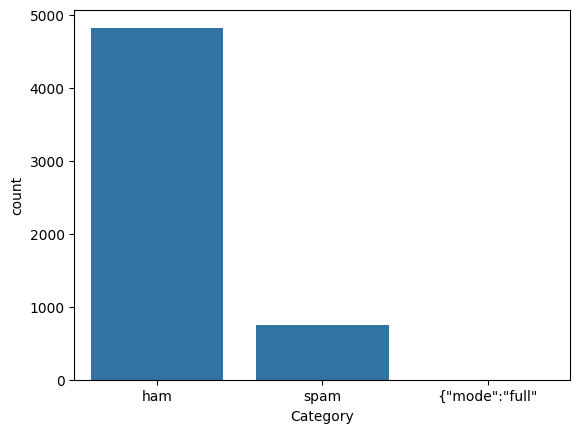

In [7]:
sns.countplot(data=emails, x='Category')

In [8]:
emails = emails[emails['Category'].isin(['ham', 'spam'])]

In [9]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 130.6+ KB


In [10]:
X = emails['Message']
y = emails['Category']

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(X)

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train ,y_train)

SVC()

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
print(accuracy_score(y_test, y_pred))

0.9741564967695621


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1193
           1       0.99      0.82      0.90       200

    accuracy                           0.97      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.97      0.97      0.97      1393



In [33]:
print(confusion_matrix(y_test, y_pred))

[[1192    1]
 [  35  165]]
